<a href="https://colab.research.google.com/github/ColbyLe/CS499A1/blob/master/CS499A1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h2>Assignment 1 - Linear Regression on Boston Housing Data</h2>

In [0]:
# The modules we're going to use
from __future__ import print_function
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn import datasets, linear_model
from sklearn.linear_model import LinearRegression
from scipy import linalg
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.lines as mlines

# When you execute a code to plot with a simple SHIFT-ENTER, the plot will be shown directly under the code cell
%matplotlib inline

In [0]:
# Load data from scikit-learn, which returns (data, target)
# note: if you call "boston = load_boston()", it returns a dictionary-like object
data, target = datasets.load_boston(True)

# Split the data into two parts: training data and testing data
train_data,test_data,train_target,test_target = train_test_split(data,(target[:, np.newaxis]), test_size=0.2, random_state=42)

<h4>Use scikit-learn library in the following cell</h4>

In [0]:
# Loss Function
def meanSqErr(t_target, t_pred):
  # initialize err with value of zero
  err = 0
  # for each item in target and prediction vectors, compute squared error, then add to err
  for i in range(len(t_target)):
    err += ((t_target[i] - t_pred[i]) ** 2)
  # return mean squared error
  return err / (len(t_target)*2)

In [0]:
print("SciKit Learn\n")

# Task 1-1: use linear regression in sklearn
linReg = LinearRegression()
linReg.fit(train_data, train_target)

# Task 1-2: show intercept and coefficents
# print first item in weights vector (intercept)
print("Intercept: ", linReg.intercept_)
# print the rest of the items in the weights vector (coefficients)
print("Coefficients: \n", np.transpose(linReg.coef_))
print()

# Task 1-3: show errors on training dataset and testing dataset
# generate predictions for training and testing datasets, compute loss, then print loss
train_pred = linReg.predict(train_data)
print("Training Error: ", meanSqErr(train_target, train_pred))
test_pred = linReg.predict(test_data)
print("Testing Error: ", meanSqErr(test_target, test_pred))


SciKit Learn

Intercept:  [22.79653465]
Coefficients: 
 [[-1.00213533]
 [ 0.69626862]
 [ 0.27806485]
 [ 0.7187384 ]
 [-2.0223194 ]
 [ 3.14523956]
 [-0.17604788]
 [-3.0819076 ]
 [ 2.25140666]
 [-1.76701378]
 [-2.03775151]
 [ 1.12956831]
 [-3.61165842]]

Training Error:  [10.82070638]
Testing Error:  [12.14555974]


<h4>Use analytical solution (normal equation) to perform linear regression in the following cell</h4>

In [0]:
print("Analytical Solution\n")

# Task 2-1: Implement a function solving normal equation 
# Inputs: Training data and  training label
# Output: Weights
def myNormalEqualFun(t_data, t_label):
  # single line equivalent of
  # weights = np.linalg.matrix_power(np.matmul(np.transpose(t_data), t_data), -1)
  # weights = np.matmul(weights, np.transpose(t_data))
  # weights = np.matmul(weights, t_label)
  # normal equation
  weights = np.dot(np.dot(np.linalg.matrix_power(np.dot(np.transpose(t_data), t_data), -1), np.transpose(t_data)), t_label)
  return weights 
    
# Task 2-2: Implement a function performing prediction
# Inputs: Testing data and weights
# Output: Predictions
def myPredictFun(t_data, w):
  # generate prediction vector
  predictions = np.matmul(t_data, w)
  return predictions

# Here we insert a column of 1s into training_data and test_data (to be consistent with our lecture slides)
train_data_intercept = np.insert(train_data, 0, 1, axis=1)
test_data_intercept = np.insert(test_data, 0, 1, axis=1)
#print("test data shape: ", test_data_intercept.shape)

# Here we call myNormalEqual to train the model and get weights
w = myNormalEqualFun(train_data_intercept,train_target)

# Task 2-3: show intercept and coefficents
# print intercept
print("Intercept: ", w[0])

# print coefficients
s = slice(1, w.size, 1)
print("Coefficients: \n", w[s])
print()

# Task 2-4: show errors on training dataset and testing dataset
# get predictions, then use that to print loss
trainPred = myPredictFun(train_data_intercept, w)
print("Training Error: ", meanSqErr(train_target, trainPred))

testPred = myPredictFun(test_data_intercept, w)
print("Testing Error: ", meanSqErr(test_target, testPred))


Analytical Solution

Intercept:  [22.79653465]
Coefficients: 
 [[-1.00213533]
 [ 0.69626862]
 [ 0.27806485]
 [ 0.7187384 ]
 [-2.0223194 ]
 [ 3.14523956]
 [-0.17604788]
 [-3.0819076 ]
 [ 2.25140666]
 [-1.76701378]
 [-2.03775151]
 [ 1.12956831]
 [-3.61165842]]

Training Error:  [10.82070638]
Testing Error:  [12.14555974]


[link text](https://)<h4>Use numerical solution (basic gradient descent) to perform linear regression in the following cell</h4>

Gradient Descent

Intercept:  [22.79653465]
Coefficients: 
 [[-1.00211476]
 [ 0.69622011]
 [ 0.27797203]
 [ 0.71875289]
 [-2.02230924]
 [ 3.14526203]
 [-0.17605624]
 [-3.08189577]
 [ 2.25112728]
 [-1.76670193]
 [-2.03774319]
 [ 1.12956663]
 [-3.61164476]]
Training Error:  [10.82070638]
Testing Error:  [12.14563952]


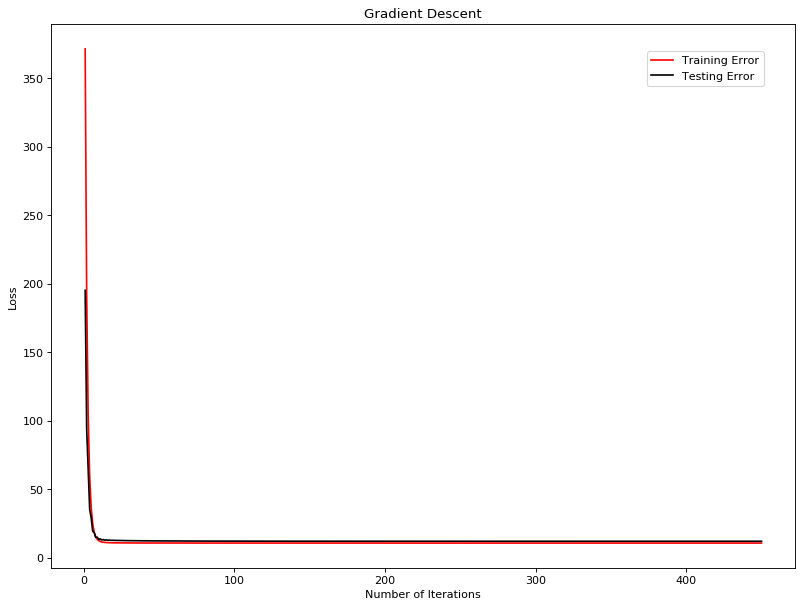

In [0]:
print("Gradient Descent\n")

# Feature scaling
scaler = preprocessing.StandardScaler().fit(train_data)
train_data = scaler.transform(train_data)
test_data = scaler.transform(test_data)


# Task 3-1: Implement a function performing gradient descent
# Inputs: Training data, training label, learning rate, number of iterations
# Output: the final Weights
#         the loss history along iterations
def myGradientDescentFun(X, y, test_X, test_y, learning_rate,numItrs):
    # N is equal to the size of the target vector
    N = y.shape[0]
    # initialize weights vector with random values
    weights = np.random.randn(X.shape[1], 1)
    # intitialize historical loss vectors with zeroes
    loss = np.zeros(numItrs)
    v_loss = np.zeros(numItrs)
    
    for i in range(numItrs):
      # implement gradient descent function here
      pred = myPredictFun(X, weights)
      # gradient equation from class
      grad = -(1/N) * X.T.dot(np.subtract(y,pred))
      # calculate new weights
      weights = weights - (learning_rate * grad)
      # calculate loss for current iteration for training and testing datasets
      loss[i] = meanSqErr(y, pred)
      v_loss[i] = meanSqErr(test_y, myPredictFun(test_X, weights))
    # return weights and historical loss vectors
    return weights, loss, v_loss

# Task 3-2: Implement a function performing prediction
# Inputs: Testing data and weights
# Output: Predictions (N*1 matrix)
def myPredictFun(X,w):
    # generate predictions using data matrix and weights vector
    predictions = np.matmul(X, w)
    return predictions

# Here we insert a column of 1s into training_data and test_data (to be consistent with our lecture slides)
train_data_intercept = np.insert(train_data, 0, 1, axis=1)
test_data_intercept = np.insert(test_data, 0, 1, axis=1)

# Here we call myGradientDescentFun to train the model and get weights
# Note: you need to figure out good learning rate value and the number of iterations
w, train_loss, test_loss = myGradientDescentFun(train_data_intercept,train_target, test_data_intercept, test_target, 0.3,450)


# Task 3-3: show intercept and coefficents
s = slice(1, w.size, 1)
print("Intercept: ", w[0])
print("Coefficients: \n", w[s])

# Task 3-4: show errors on training dataset and testing dataset
train_pred = myPredictFun(train_data_intercept, w)
print("Training Error: ", meanSqErr(train_target, train_pred))

test_pred = myPredictFun(test_data_intercept, w)
print("Testing Error: ", meanSqErr(test_target, test_pred))


# Task 3-5: plot learning curves showing training errors and testing errors along iterations
# x axis size = number of iterations
x_axis = np.arange(1,train_loss.size+1)
# change size of plot
plt.figure(num=None, figsize=(12, 9), dpi=80, facecolor='w', edgecolor='k')
# plot training error as a red line
plt.plot(x_axis, train_loss, 'r-', label="Training Error")
# plot testing error as a black line
plt.plot(x_axis, test_loss, 'k-', label = "Testing Error")
# generate plot legend
plt.legend(bbox_to_anchor=(0.8, 0.95), loc='upper left', borderaxespad=0.)
# add labels
plt.xlabel("Number of Iterations")
plt.ylabel("Loss")
plt.title("Gradient Descent")
plt.show()

<h4>Use numerical solution (stochastic gradient descent) to perform linear regression in the following cell</h4>

Intercept:  [22.7836186]
Coefficients: 
 [[-0.90811748]
 [ 0.63463833]
 [ 0.19925353]
 [ 0.8450501 ]
 [-2.02271738]
 [ 3.10794235]
 [-0.12331203]
 [-3.15089672]
 [ 2.05527065]
 [-1.2693427 ]
 [-1.94040915]
 [ 1.18174785]
 [-3.74383978]]
Training Error:  [10.90830671]
Testing Error:  [12.25166238]


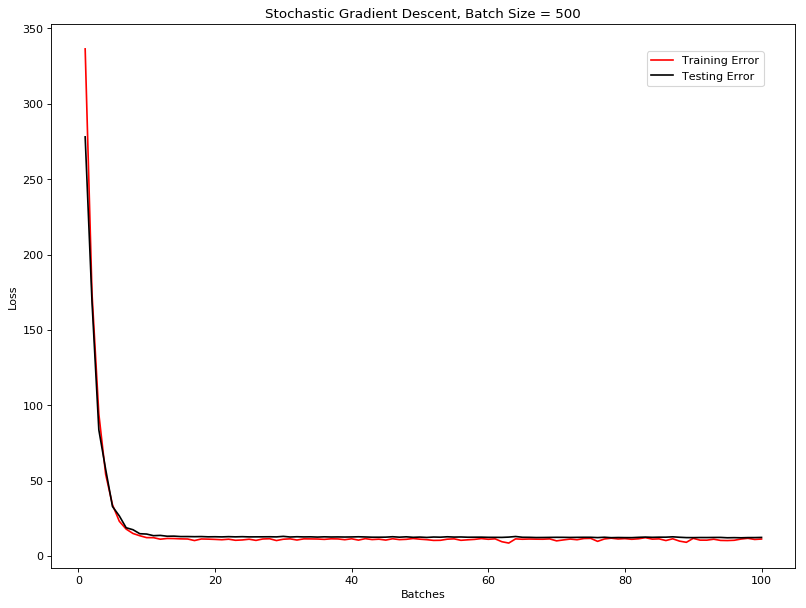

In [0]:
# Feature scaling
scaler = preprocessing.StandardScaler().fit(train_data)
train_data = scaler.transform(train_data)
test_data = scaler.transform(test_data)

# Task 4-1: Implement a function performing gradient descent
# Inputs: Training data, training label, learning rate, number of epoches, batch size
# Output: the final Weights
#         the loss history along batches
def myGradientDescentFun(X, y, test_X, test_y, learning_rate, epoches, batchsize):
  # N = size of target vector
  N = y.shape[0]
  # initialize historical loss vectors with zeroes
  loss = np.zeros(epoches)
  v_loss = np.zeros(epoches)
  # number of batches = N divided by number of batches
  numBatches = int(N/batchsize)
  # initialize weights vector with random values
  weights = np.random.randn(X.shape[1], 1)
  
  # for each epoch, set current loss to zero, then randomize the order of X and y
  for i in range(epoches):
    currLoss = 0.0
    v_currLoss = 0.0
    # shuffle dataset matrix and target vector such that they are in the same relative order
    shufOrder = np.random.permutation(N)
    X = X[shufOrder]
    y = y[shufOrder]
    
    # for each iteration, get a random batch
    for j in range(0, N, batchsize):
      X_i = X[i:i+batchsize]
      y_i = y[i:i+batchsize]
      
      pred = myPredictFun(X_i, weights)
      # update training loss
      currLoss += meanSqErr(y_i, pred)
      # update current testing loss
      v_currLoss += meanSqErr(test_y, myPredictFun(test_X, weights))
      # get gradient
      grad = -(1/N) * X_i.T.dot(np.subtract(y_i, pred))
      # update weights
      weights = weights - (learning_rate * grad)
    loss[i] = currLoss
    v_loss[i] = v_currLoss
  return weights, loss, v_loss

# Task 4-2: Implement a function performing prediction
# Inputs: Testing data and weights
# Output: Predictions
def myPredictFun(X,w):
    predictions = np.matmul(X, w)
    return predictions

# Here we insert a column of 1s into training_data and test_data (to be consistent with our lecture slides)
train_data_intercept = np.insert(train_data, 0, 1, axis=1)
test_data_intercept = np.insert(test_data, 0, 1, axis=1)

# Here we call myGradientDescentFun to train the model and get weights
# Note: you need to figure out good learning rate value and the number of iterations
bS = 500
w, train_loss, test_loss = myGradientDescentFun(train_data_intercept,train_target, test_data_intercept, test_target, 0.3, 100, bS)

# Task 4-3: show intercept and coefficents
s = slice(1, w.size, 1)
print("Intercept: ", w[0])
print("Coefficients: \n", w[s])

# Task 4-4: show errors on training dataset and testing dataset
train_pred = myPredictFun(train_data_intercept, w)
print("Training Error: ", meanSqErr(train_target, train_pred))

test_pred = myPredictFun(test_data_intercept, w)
print("Testing Error: ", meanSqErr(test_target, test_pred))

# Task 4-5: plot learning curves showing training errors and testing errors along bath
# x axis size = number of iterations
x_axis = np.arange(1,train_loss.size+1)
# change size of plot
plt.figure(num=None, figsize=(12, 9), dpi=80, facecolor='w', edgecolor='k')
# plot training error as a red line
plt.plot(x_axis, train_loss, 'r-', label="Training Error")
# plot testing error as a black line
plt.plot(x_axis, test_loss, 'k-', label = "Testing Error")
# generate plot legend
plt.legend(bbox_to_anchor=(0.8, 0.95), loc='upper left', borderaxespad=0.)
# add labels
plt.xlabel("Batches")
plt.ylabel("Loss")
title = "Stochastic Gradient Descent, Batch Size = " + str(bS)
plt.title(title)
plt.show()